# Mobile Price Classification 


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import the data set
df = pd.read_csv('Mobile_Dataset.csv')

In [58]:
#explore the data set upto first 10 records
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
df.shape

(2000, 21)

We have 2000 samples and 21 attributes.
The last attribute is a target attribute, which means that we have labeled data.

In [10]:
#finding missing or null values in the data set
pd.isnull(df).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We do not have any null values in our dataset. It will ease the preprocessing step.

In [12]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "x".

In [15]:
y = df['price_range']
x = df.drop('price_range', axis = 1)

In [16]:
# We have four price ranges as target values and will do multi-class classification in our study.
y.unique()

array([1, 2, 3, 0], dtype=int64)

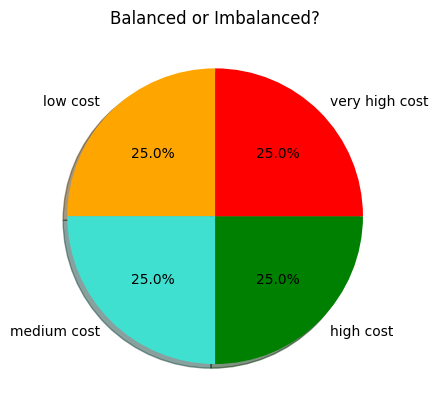

In [18]:
# we have to see our data set is balanced or imbalanced
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = df['price_range'].value_counts().values
colors = ['orange','turquoise','green', 'red']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Balanced or Imbalanced?')
plt.show()

This shows that our data set is balanced

<AxesSubplot: >

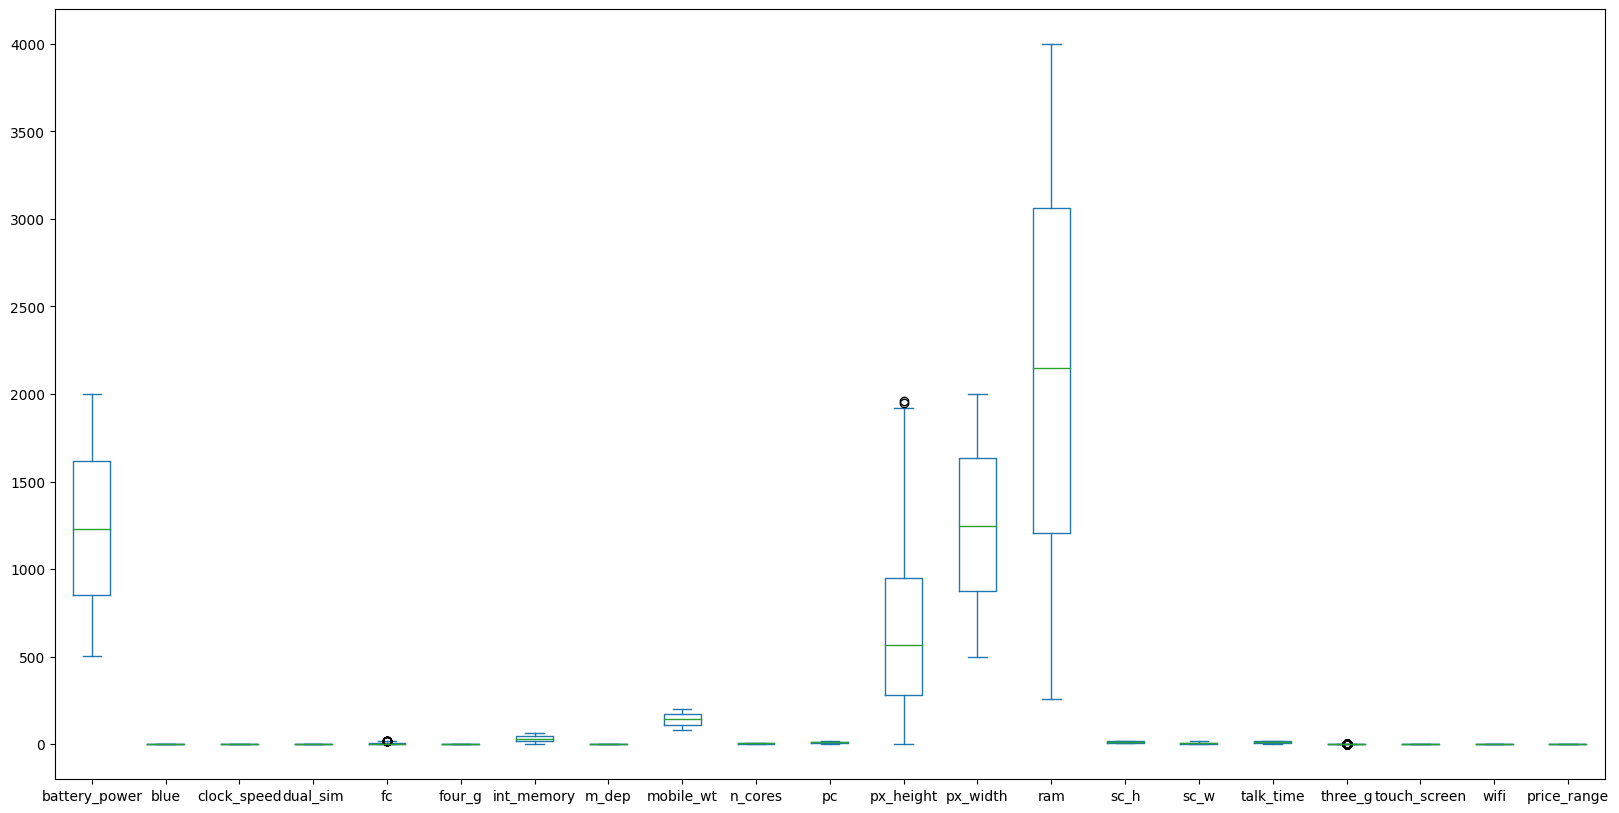

In [19]:
#checking for outliers
df.plot(kind='box',figsize=(20,10))

According to above boxplot we can assume that there is no any outliers in the data set

In addition to 'Mobile_Dataset.csv' file, we do not have a 'test_data.csv' file, so we do not have the chance of testing our model with it.
We split our dataset into 'training' and 'validation' datasets. And, we are going to see our models' accuracy by applying them on validation dataset.

In [20]:
#splitting data set
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)

In [21]:
# check whether the split works correctly 
print(x_train.shape)
print(x_valid.shape)

(1600, 20)
(400, 20)


## Implementing KNN Algorithm

'K' is the number of nearest training points which we classify them using the majority vote.

In [22]:
#in here we just assume a suitable value for k (k=3)
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_pred_knn = model_knn.predict(x_valid)
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[94  6  0  0]
 [ 3 96  1  0]
 [ 0  3 92  5]
 [ 0  0  7 93]]


In [32]:
#looking for the acuracy of the trained model with the assumed k value
print(accuracy_score(y_valid, y_pred_knn))

0.9375


 In the first try, we did not know the optimum 'k'.
Let's find the optimum 'k' value via Grid Search method and run knn model with this 'k'.
(we can use "Elbow" method also, then we have to take optimum 'k' by looking at a plot or set of score values.)


In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
model.best_params_


{'n_neighbors': 9}

After finding optimum k number by using Grid Search Method, we run our model again with k=9. This solves the overfitting problem

In [42]:
#using optimum k value
model_knn = KNeighborsClassifier(n_neighbors=9)  
model_knn.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=9)

In [43]:
y_pred_knn = model_knn.predict(x_valid)
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[95  5  0  0]
 [ 2 96  2  0]
 [ 0  3 94  3]
 [ 0  0  6 94]]


In [204]:
#looking for the acuracy of the trained model with the optimum k value
acc_sc = accuracy_score(y_valid, y_pred_knn)
print(accuracy_score(y_valid, y_pred_knn))

0.9475


By using the optimum 'k' value 

In [200]:
from sklearn.metrics import classification_report
print(classification_report(y_valid,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       100
           1       0.92      0.96      0.94       100
           2       0.92      0.94      0.93       100
           3       0.97      0.94      0.95       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [52]:
x_valid.head(400)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1391,794,0,2.5,1,15,0,14,0.6,197,3,19,312,1376,2171,19,8,18,0,0,1
362,1976,1,0.7,1,4,0,32,0.8,171,2,7,1301,1922,3699,17,11,13,0,1,1
923,1027,1,2.2,0,0,0,63,0.8,102,5,4,152,714,1732,8,5,13,0,1,1
1508,1554,0,2.8,1,7,0,23,0.1,105,6,18,699,1492,2184,13,9,20,1,0,1
233,1442,0,1.0,1,0,0,27,0.1,192,3,19,231,687,2227,6,5,20,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,563,0,2.0,1,3,0,47,0.3,115,7,12,211,684,3012,14,4,15,1,0,0
1091,1709,1,0.8,0,8,1,58,0.8,136,2,10,956,1292,1781,18,3,17,1,0,0
122,825,1,0.5,1,7,0,52,0.9,130,3,10,597,863,3534,10,4,6,0,1,0
867,1498,1,0.7,0,3,1,8,0.1,170,7,4,347,1076,3358,7,3,19,1,0,0


In [49]:
#validating the built model using the splitted test data
predicted_price_range = model_knn.predict(x_valid) 

In [51]:
print(predicted_price_range)

[1 3 1 2 1 3 0 0 1 0 1 0 0 3 1 2 2 0 1 3 3 3 2 1 2 1 3 2 3 2 1 1 3 2 3 2 1
 0 1 2 2 3 0 1 0 0 1 1 0 3 3 2 0 3 1 3 0 2 3 0 3 3 0 2 1 1 1 3 1 3 0 2 0 1
 1 1 3 2 2 3 3 2 3 1 1 1 3 0 1 3 3 3 0 1 1 1 2 0 1 3 2 3 0 1 1 2 0 2 3 2 2
 2 0 1 2 0 3 2 2 3 0 1 1 3 0 2 3 3 0 3 1 0 2 0 1 1 1 0 3 0 0 1 1 1 2 0 2 0
 1 3 0 1 2 3 3 3 1 0 0 2 0 1 2 2 2 3 1 3 3 2 3 2 1 3 1 0 2 0 0 0 3 2 0 2 1
 0 2 1 0 0 0 3 0 3 1 2 1 2 2 0 0 1 1 2 2 1 2 1 3 1 3 0 0 2 2 1 1 1 0 1 2 2
 3 0 0 3 0 3 0 1 3 0 2 1 1 0 2 0 3 0 1 1 3 0 2 2 0 2 1 1 2 0 3 1 3 2 2 3 1
 3 0 3 3 2 0 3 3 0 0 1 1 2 0 1 2 2 2 3 1 1 0 3 0 0 2 2 2 3 2 2 0 0 3 1 3 1
 1 1 1 2 1 0 0 0 0 2 3 1 1 0 3 2 2 1 2 3 0 0 3 1 3 1 2 0 2 3 0 2 0 0 3 0 3
 2 2 0 0 2 3 3 2 3 0 3 2 0 1 1 3 1 3 3 2 1 1 3 1 1 2 2 0 1 1 2 2 2 0 2 0 0
 3 2 3 1 3 0 3 2 0 1 3 1 2 2 2 1 3 3 2 2 0 3 3 2 1 2 2 2 3 1]


In [53]:
x_valid['price_range'] = predicted_price_range

In [57]:
x_valid.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1391,794,0,2.5,1,15,0,14,0.6,197,3,...,312,1376,2171,19,8,18,0,0,1,1
362,1976,1,0.7,1,4,0,32,0.8,171,2,...,1301,1922,3699,17,11,13,0,1,1,3
923,1027,1,2.2,0,0,0,63,0.8,102,5,...,152,714,1732,8,5,13,0,1,1,1
1508,1554,0,2.8,1,7,0,23,0.1,105,6,...,699,1492,2184,13,9,20,1,0,1,2
233,1442,0,1.0,1,0,0,27,0.1,192,3,...,231,687,2227,6,5,20,1,1,0,1


We have achieved our goal and predicted price ranges for mobile phones in our testing dataset.

## Implementing MLP 

In [59]:
import os

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [61]:
# we have four price ranges
print(np.unique(df['price_range']))

[0 1 2 3]


In [62]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [63]:
# Divide the data to input and target and Changing pandas dataframe to numpy array
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [64]:
# Feature Selection for better results and accuracy
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [65]:
kbest = SelectKBest(chi2,k=10)
best_feaures = kbest.fit(X,y)
best_feaures.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [67]:
df_features = pd.DataFrame(best_feaures.scores_)
df_columns = pd.DataFrame(X.columns)

In [68]:
featureScores = pd.concat([df_columns,df_features],axis=1)

In [69]:
featureScores.columns = ['Features','Score']

In [70]:
#make scores in descending order
featureScores.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [72]:
X = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']]

In [73]:
X

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [74]:
X = X.values
y = y.values

In [75]:
print(X.shape,y.shape)

(2000, 10) (2000,)


In [76]:
# Normalisation and scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [77]:
y = y.reshape(-1,1)

In [78]:
# y labels to one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

In [79]:
y = y.toarray()

In [80]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [187]:
# Neural network Model
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 88        
                                                                 
 dense_37 (Dense)            (None, 6)                 54        
                                                                 
 dense_38 (Dense)            (None, 4)                 28        
                                                                 
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [190]:
history = model.fit(X_train,y_train,epochs=105,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/105
25/25 [==============================] - 1s 7ms/step - loss: 1.3981 - accuracy: 0.2731 - val_loss: 1.3936 - val_accuracy: 0.2825
Epoch 2/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3777 - accuracy: 0.2962 - val_loss: 1.3765 - val_accuracy: 0.3125
Epoch 3/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3593 - accuracy: 0.3344 - val_loss: 1.3595 - val_accuracy: 0.3425
Epoch 4/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3390 - accuracy: 0.3775 - val_loss: 1.3386 - val_accuracy: 0.3775
Epoch 5/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3147 - accuracy: 0.4044 - val_loss: 1.3130 - val_accuracy: 0.3950
Epoch 6/105
25/25 [==============================] - 0s 2ms/step - loss: 1.2844 - accuracy: 0.4231 - val_loss: 1.2819 - val_accuracy: 0.4150
Epoch 7/105
25/25 [==============================] - 0s 2ms/step - loss: 1.2482 - accuracy: 0.4519 - val_loss: 1.2457 - val_accuracy: 0.4375
Epoch 8/105
2

In [191]:
y_pred = model.predict(X_test)

#inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 918us/step


In [192]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 96.75


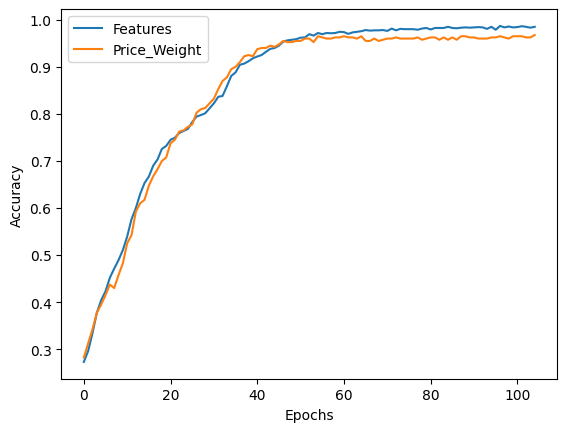

In [193]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

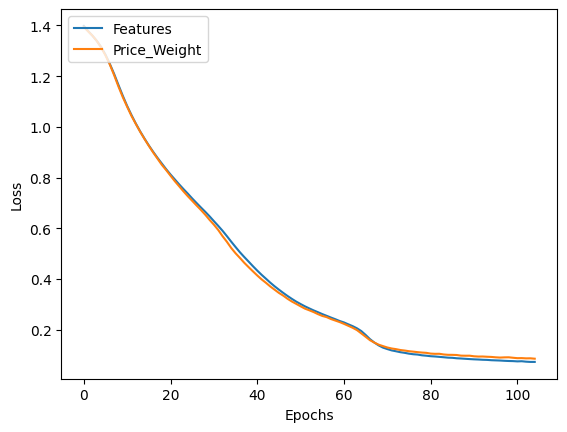

In [194]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

In [196]:
#post training analysis
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test,pred)
print(conf_mat)

[[ 94   0   0   0]
 [  0  98   4   0]
 [  0   2 112   6]
 [  0   0   1  83]]


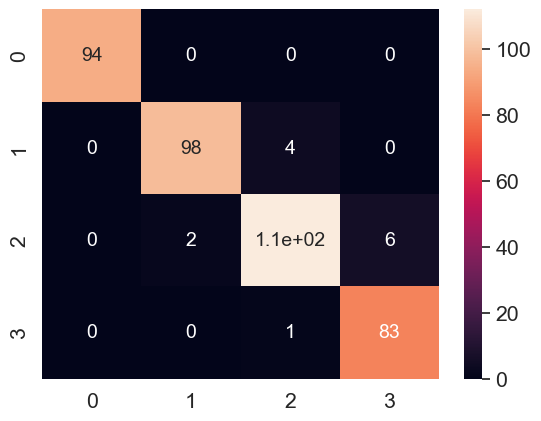

In [198]:
import seaborn as sns
array = conf_mat

df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(12,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}) # font size

plt.show()

In [199]:
from sklearn.metrics import classification_report
print(classification_report(test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       0.98      0.96      0.97       102
           2       0.96      0.93      0.95       120
           3       0.93      0.99      0.96        84

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [201]:
#predict the class
y_probability = model.predict(X_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_classes[0])

13/13 [==============================] - 0s 1ms/step
True class =  [0. 1. 0. 0.] Predicted class =  1


In [202]:
#Saving the trained model and its weights
json_string = model.to_json() # as json 
open('mlp_moblie_dataset.json', 'w').write(json_string)
# save the weights in h5 format 
model.save_weights('mlp_mobile_dataset.h5')

## Finding most accuracy model


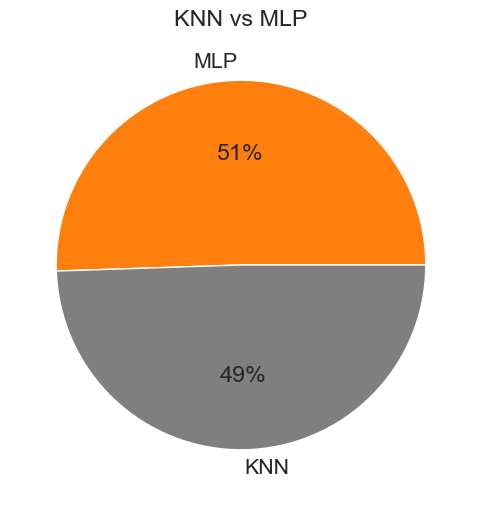

In [219]:
plt.rcParams["figure.figsize"] = (6,6)
models = ['MLP','KNN']
scores = [acc,acc_sc]
color=['tab:orange', 'tab:gray']
fig, ax = plt.subplots()
ax.pie(scores, colors= color, labels = models, autopct = '%.0f%%')
plt.title("KNN vs MLP")

plt.show()